In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset : https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets -> But we use the Engish only

### a. Dataset Raw : 

In [10]:
dataset = pd.read_csv("Dataset.csv", index_col = 0)
dataset.head(2)

,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
subject,,,,,,,,,,,,,,,
Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28587 entries, Wesentlicher Sicherheitsvorfall to Inquiry About Project Management Features
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      28587 non-null  object
 1   answer    28580 non-null  object
 2   type      28587 non-null  object
 3   queue     28587 non-null  object
 4   priority  28587 non-null  object
 5   language  28587 non-null  object
 6   version   28587 non-null  int64 
 7   tag_1     28587 non-null  object
 8   tag_2     28574 non-null  object
 9   tag_3     28451 non-null  object
 10  tag_4     25529 non-null  object
 11  tag_5     14545 non-null  object
 12  tag_6     5874 non-null   object
 13  tag_7     2040 non-null   object
 14  tag_8     565 non-null    object
dtypes: int64(1), object(14)
memory usage: 3.5+ MB


In [14]:
print("Shape Dataset :",dataset.shape)

Shape Dataset : (28587, 15)


In [15]:
dataset.isna().sum()

body            0
answer          7
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
tag_2          13
tag_3         136
tag_4        3058
tag_5       14042
tag_6       22713
tag_7       26547
tag_8       28022
dtype: int64

### b. Dataset Clean : 

In [3]:
dataset = pd.read_csv("English_Dataset_Clean.csv", index_col = 0)
dataset.head(2)

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16335 entries, 1 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   13729 non-null  object
 1   body      16335 non-null  object
 2   answer    16335 non-null  object
 3   type      16335 non-null  object
 4   queue     16335 non-null  object
 5   priority  16335 non-null  object
 6   language  16335 non-null  object
 7   version   16335 non-null  int64 
 8   tag_1     16335 non-null  object
 9   tag_2     16329 non-null  object
 10  tag_3     16266 non-null  object
 11  tag_4     14626 non-null  object
 12  tag_5     8415 non-null   object
 13  tag_6     3370 non-null   object
 14  tag_7     1134 non-null   object
 15  tag_8     281 non-null    object
dtypes: int64(1), object(15)
memory usage: 2.1+ MB


In [9]:
print("Shape Dataset :",dataset.shape)

Shape Dataset : (16335, 16)


In [7]:
dataset.isna().sum()

subject      2606
body            0
answer          0
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
tag_2           6
tag_3          69
tag_4        1709
tag_5        7920
tag_6       12965
tag_7       15201
tag_8       16054
dtype: int64

### 1. Queue Classification Frequency

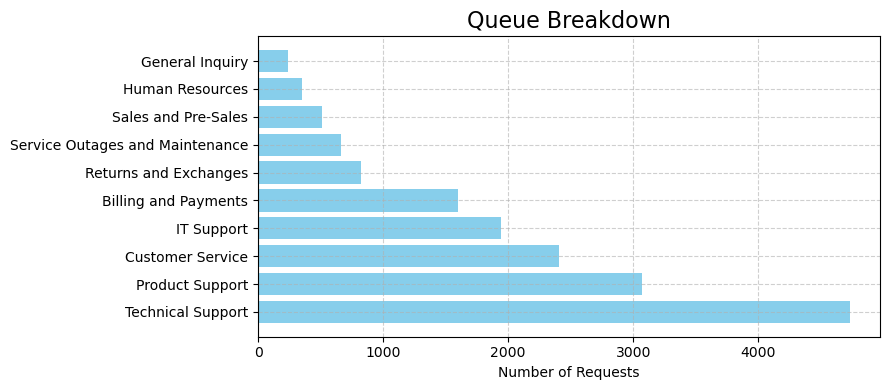

In [3]:
# Assuming 'dataset' is a pandas DataFrame and it has a 'queue' column
# Generate the value counts for the 'queue' column
queue_counts = dataset["queue"].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9, 4))

# Plotting the bar chart using value counts
ax.barh(queue_counts.index, queue_counts.values, color='skyblue')

# Adding title and labels
ax.set_title('Queue Breakdown', fontsize=16)
ax.set_xlabel('Number of Requests', fontsize=10)

# Adding gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


### 2. Priority Classification Frequency

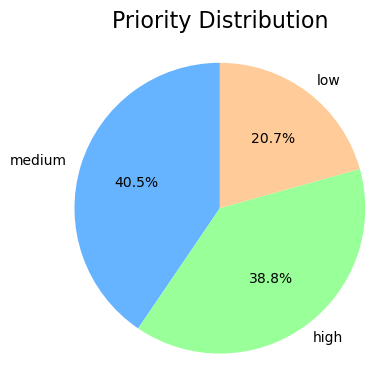

In [4]:
# Assuming 'dataset' is a pandas DataFrame and it has a 'priority' column
# Generate the value counts for the 'priority' column
priority_counts = dataset["priority"].value_counts()

# Create a figure
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the pie chart using priority_counts
ax.pie(priority_counts.values, labels=priority_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

# Adding title
ax.set_title('Priority Distribution', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### 3. Type Classification Frequency

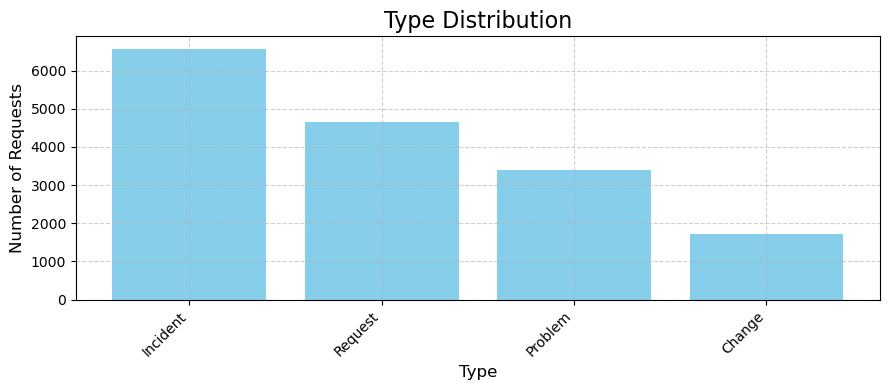

In [5]:
# Assuming 'dataset' is a pandas DataFrame and it has a 'type' column
# Generate the value counts for the 'type' column
type_counts = dataset["type"].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9, 4))

# Plotting the bar chart using type_counts
ax.bar(type_counts.index, type_counts.values, color='skyblue')

# Adding title and labels
ax.set_title('Type Distribution', fontsize=16)
ax.set_xlabel('Type', fontsize=12)
ax.set_ylabel('Number of Requests', fontsize=12)

# Adding gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### 4. Character Calculation Frequency

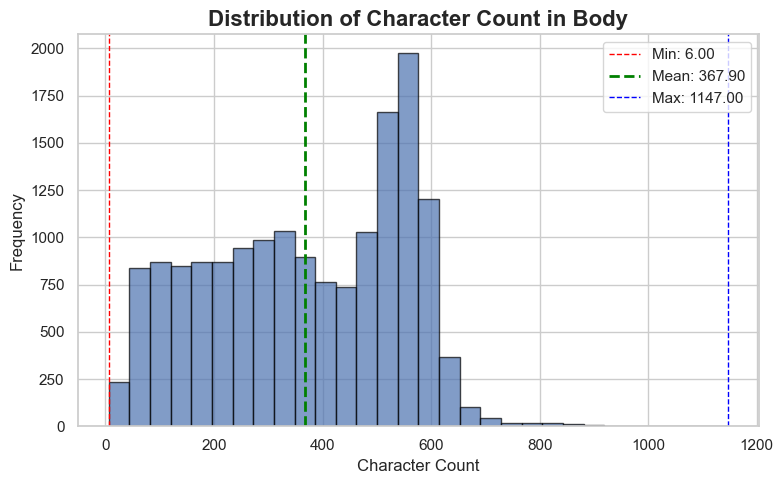

In [8]:
length = [len(i) for i in dataset["body"][:]]
min_length = np.min(length)
mean_length = np.mean(length)
max_length = np.max(length)

# Set a modern style with seaborn
sns.set(style="whitegrid")

# Create the histogram with a refined appearance
plt.figure(figsize=(8, 5))
plt.hist(length, bins=30, color='#4C72B0', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Character Count in Body', fontsize=16, fontweight='bold')
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.axvline(min_length, color='red', linestyle='--', linewidth=1, label=f'Min: {min_length:.2f}')
plt.axvline(mean_length, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(max_length, color='blue', linestyle='--', linewidth=1, label=f'Max: {max_length:.2f}')

# Show the plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()


### 5. Word Calculation Frequency

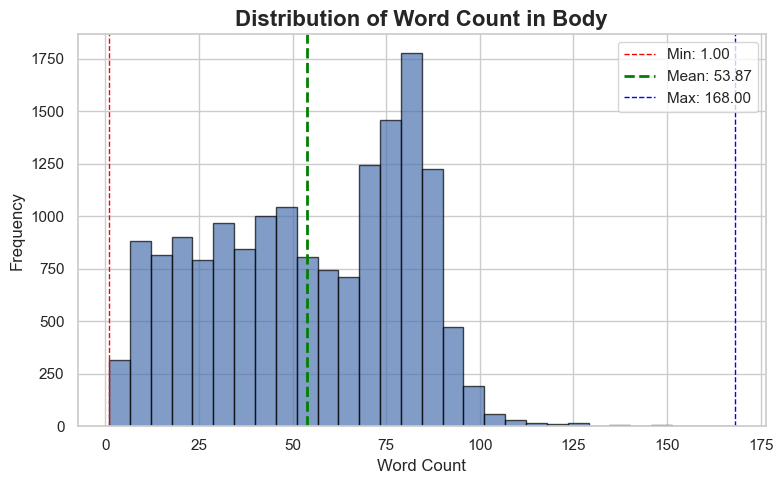

In [9]:
length = [len(i.split(" ")) for i in dataset["body"][:]]
min_length = np.min(length)
mean_length = np.mean(length)
max_length = np.max(length)

# Set a modern style with seaborn
sns.set(style="whitegrid")

# Create the histogram with a refined appearance
plt.figure(figsize=(8, 5))
plt.hist(length, bins=30, color='#4C72B0', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Word Count in Body', fontsize=16, fontweight='bold')
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.axvline(min_length, color='red', linestyle='--', linewidth=1, label=f'Min: {min_length:.2f}')
plt.axvline(mean_length, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(max_length, color='blue', linestyle='--', linewidth=1, label=f'Max: {max_length:.2f}')

# Show the plot with tight layout
plt.tight_layout()
plt.legend()
plt.show()
